In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
chess=pd.read_csv("games.csv")

In [3]:
chess.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
chess.isna().any()

id                False
rated             False
created_at        False
last_move_at      False
turns             False
victory_status    False
winner            False
increment_code    False
white_id          False
white_rating      False
black_id          False
black_rating      False
moves             False
opening_eco       False
opening_name      False
opening_ply       False
dtype: bool

In [5]:
chess.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [6]:
chess["moves"]

0        d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
1        d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...
2        e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...
3        d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...
4        e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...
                               ...                        
20053    d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...
20054    d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...
20055    d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...
20056    e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...
20057    d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...
Name: moves, Length: 20058, dtype: object

In [7]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [8]:
chess.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [9]:
chess.index

RangeIndex(start=0, stop=20058, step=1)

In [10]:
chess.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [11]:
chess.describe(include="all")

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
count,20058,20058,2.005800e+04,2.005800e+04,20058.000000,20058,20058,20058,20058,20058.000000,20058,20058.000000,20058,20058,20058,20058.000000
unique,19113,2,NaN,NaN,NaN,4,3,400,9438,NaN,9331,NaN,18920,365,1477,NaN
top,XRuQPSzH,True,NaN,NaN,NaN,resign,white,10+0,taranga,NaN,taranga,NaN,e4 e5,A00,Van't Kruijs Opening,NaN
freq,5,16155,NaN,NaN,NaN,11147,10001,7721,72,NaN,82,NaN,27,1007,368,NaN
mean,NaN,NaN,1.483617e+12,1.483618e+12,60.465999,NaN,NaN,NaN,NaN,1596.631868,NaN,1588.831987,NaN,NaN,NaN,4.816981
std,NaN,NaN,2.850151e+10,2.850140e+10,33.570585,NaN,NaN,NaN,NaN,291.253376,NaN,291.036126,NaN,NaN,NaN,2.797152
min,NaN,NaN,1.376772e+12,1.376772e+12,1.000000,NaN,NaN,NaN,NaN,784.000000,NaN,789.000000,NaN,NaN,NaN,1.000000
25%,NaN,NaN,1.477548e+12,1.477548e+12,37.000000,NaN,NaN,NaN,NaN,1398.000000,NaN,1391.000000,NaN,NaN,NaN,3.000000
50%,NaN,NaN,1.496010e+12,1.496010e+12,55.000000,NaN,NaN,NaN,NaN,1567.000000,NaN,1562.000000,NaN,NaN,NaN,4.000000
75%,NaN,NaN,1.503170e+12,1.503170e+12,79.000000,NaN,NaN,NaN,NaN,1793.000000,NaN,1784.000000,NaN,NaN,NaN,6.000000


In [12]:
l=chess.columns
    

In [13]:
l

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [14]:
k=[]
for i in l:
   k.append(i.capitalize())

In [15]:
k

['Id',
 'Rated',
 'Created_at',
 'Last_move_at',
 'Turns',
 'Victory_status',
 'Winner',
 'Increment_code',
 'White_id',
 'White_rating',
 'Black_id',
 'Black_rating',
 'Moves',
 'Opening_eco',
 'Opening_name',
 'Opening_ply']

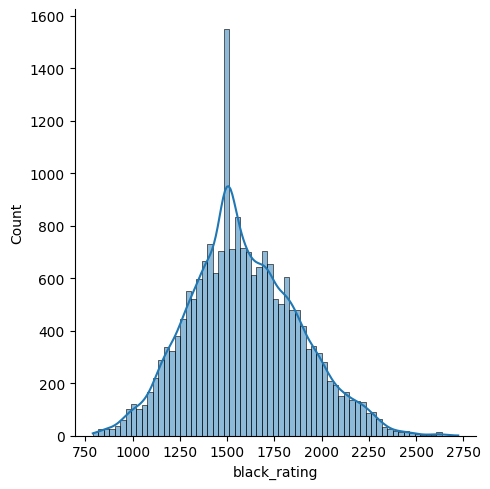

In [16]:
sns.displot(chess['black_rating'],kde=True)

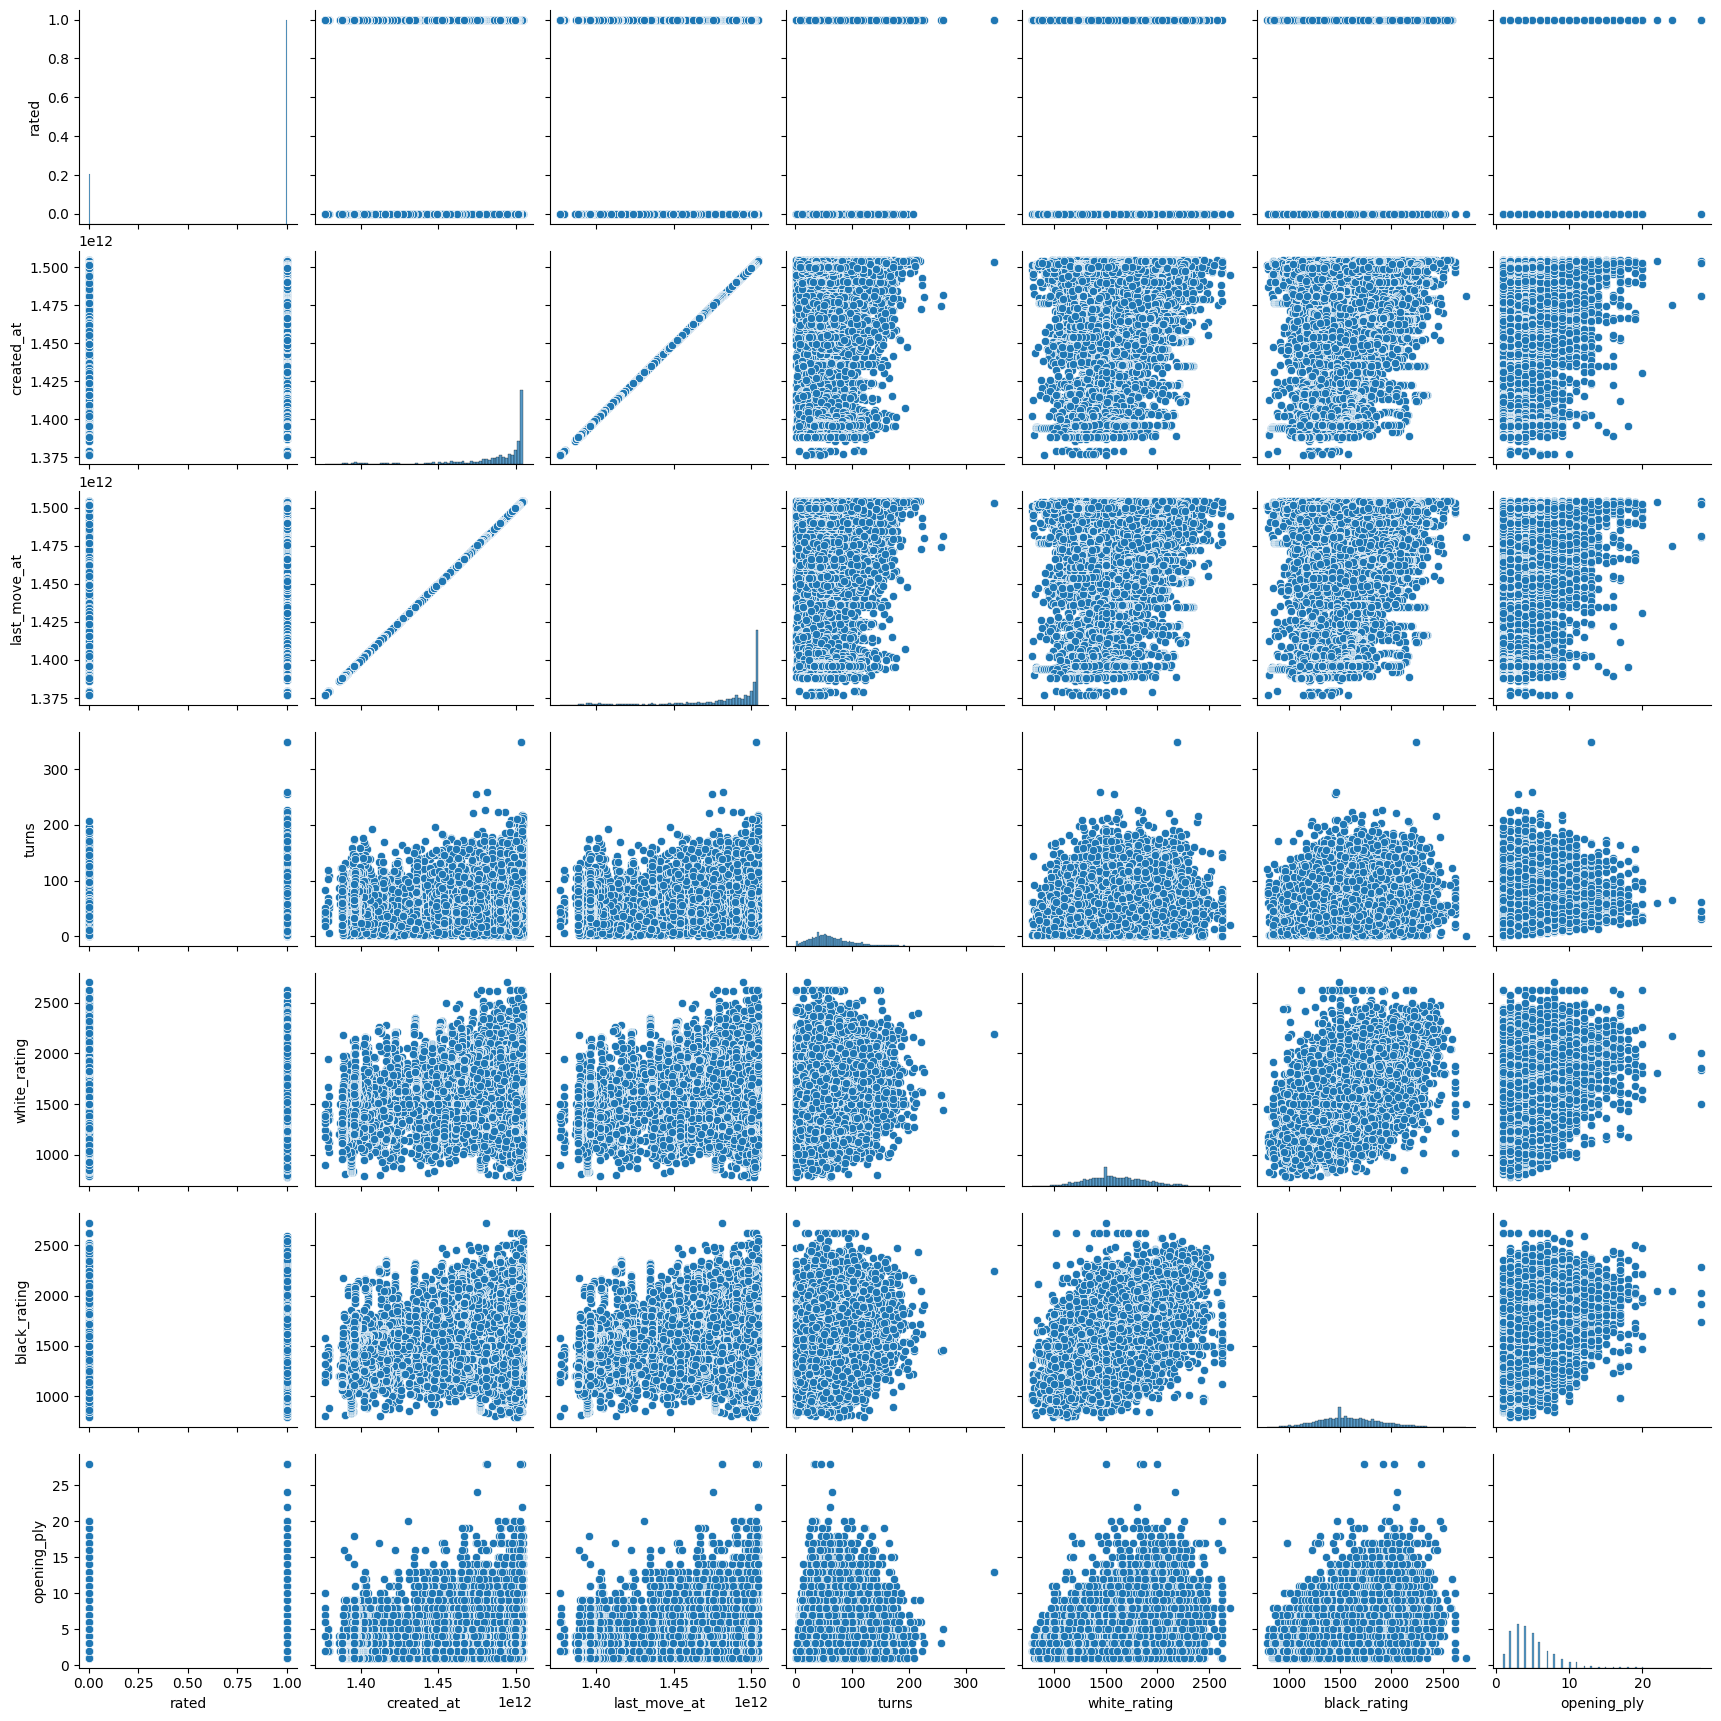

In [17]:
sns.pairplot(chess)

In [18]:
chess[["white_rating","turns"]].corr()


,white_rating,turns
white_rating,1.000000,0.129753
turns,0.129753,1.000000


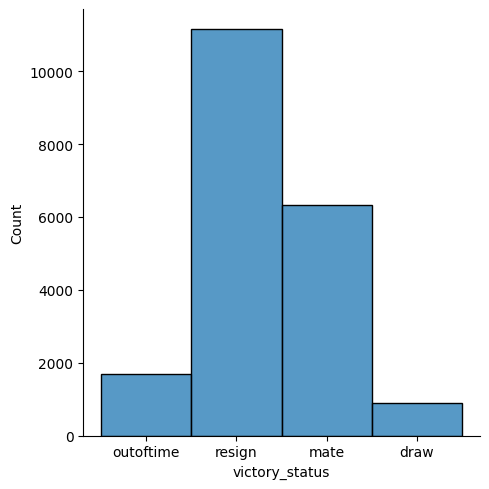

In [19]:
sns.displot(chess["victory_status"])

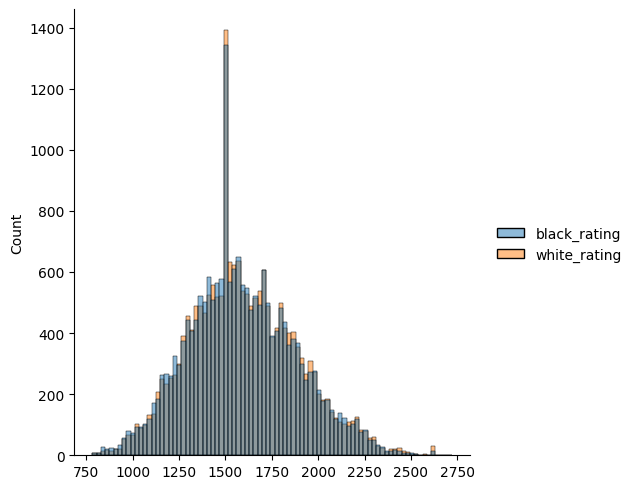

In [20]:
sns.displot(chess[["black_rating","white_rating"]])

<Axes: >

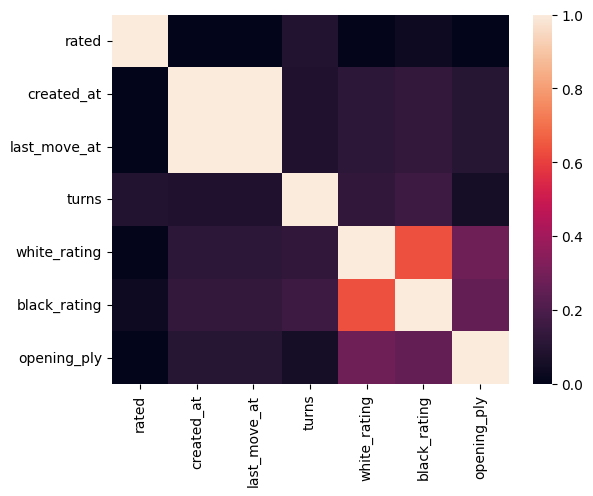

In [21]:
sns.heatmap(data=chess.corr(numeric_only=True))

In [22]:
chess.groupby("winner")

<Axes: ylabel='opening_name'>

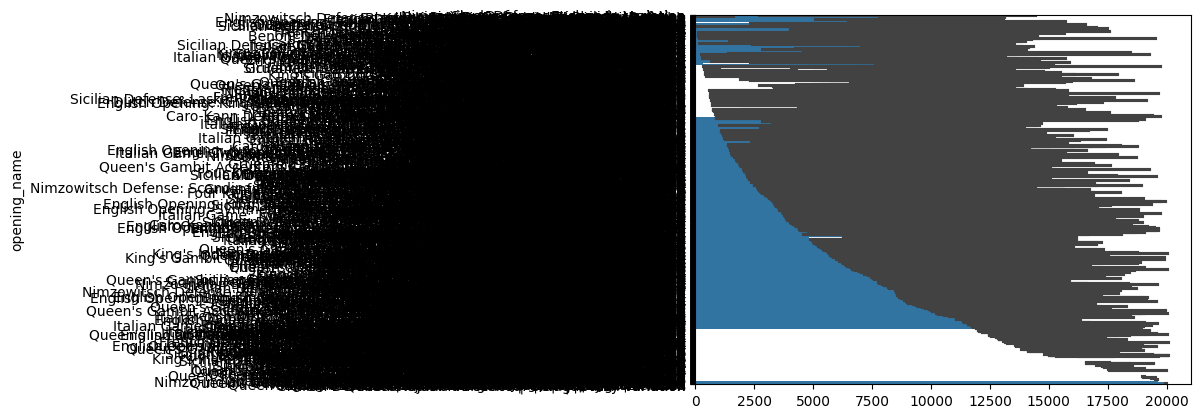

In [23]:
sns.barplot(chess["opening_name"])

In [24]:
chess

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [25]:
chess["rating_difference"]=abs(chess["white_rating"]-chess["black_rating"])

/tmp/ipykernel_15449/1368451833.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chess["rating_difference"])


<Axes: xlabel='rating_difference', ylabel='Density'>

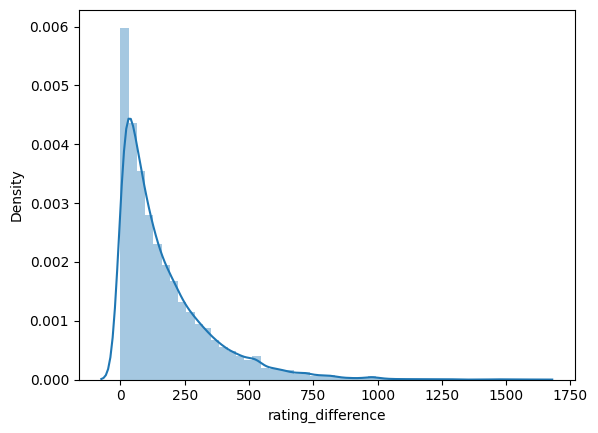

In [26]:
sns.distplot(chess["rating_difference"])

In [27]:
chess.dtypes

id                    object
rated                   bool
created_at           float64
last_move_at         float64
turns                  int64
victory_status        object
winner                object
increment_code        object
white_id              object
white_rating           int64
black_id              object
black_rating           int64
moves                 object
opening_eco           object
opening_name          object
opening_ply            int64
rating_difference      int64
dtype: object

In [28]:
chess["opening_name"].nunique()

1477

In [ ]:
chess["opening_name"].unique()